In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc


In [2]:
# load data
data = pd.read_csv('data/combined-data.csv')
data.head()

id_student code_module code_presentation  attempted_weight  adjusted_mark   
0        6516         AAA             2014J             100.0      48.055203  \
1        8462         DDD             2013J              40.0            NaN   
2        8462         DDD             2014J              50.0            NaN   
3       11391         AAA             2013J             100.0      64.006980   
4       23629         BBB             2013B              25.0      13.803681   

   mark gender               region imd_band age_band  num_of_prev_attempts   
0  31.8      M             Scotland   80-90%     55<=                     0  \
1   NaN      M        London Region   30-40%     55<=                     0   
2   NaN      M        London Region   30-40%     55<=                     1   
3  41.2      M  East Anglian Region  90-100%     55<=                     0   
4   8.3      F  East Anglian Region   20-30%     0-35                     2   

   studied_credits disability final_result             edu  
0               60          N         Pass    HE or higher  
1               90          N    Withdrawn    HE or higher  
2               60          N    Withdrawn    HE or higher  
3              240          N         Pass    HE or higher  
4               60          N         Fail  Level or lower

# Pre-process data
1. change string to integer
2. drop NAN 

In [3]:
# process data, change string to integer
# change age_band
data["age_band"] = data["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
data["edu"] = data["edu"] .map({"Level or lower":0, "HE or higher":1})

# change imd_band 
data["imd_band"] = data["imd_band"].map({"01/10/2020":'', "0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

# drop null 
data.dropna(inplace=True)
data.shape

(18187, 15)

<Axes: >

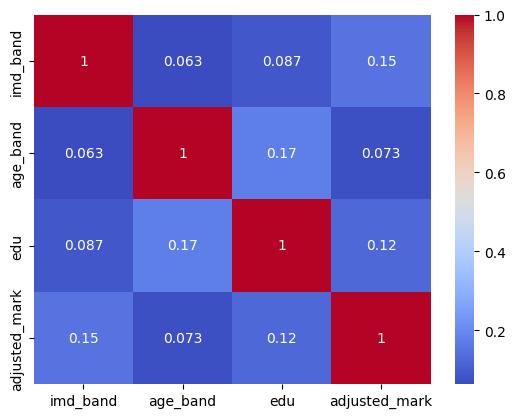

In [4]:
# create correlation matrix
columns=['imd_band', 'age_band', 'edu','adjusted_mark']
corr_matrix = data[columns].corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# K-Means clustering
using the Elbow Technique to find the optimal value of k, which is 3.

In [9]:
# preprocessing using min max scaler
#  'imd_band', 'age_band', 'edu','adjusted_mark'

scaler= MinMaxScaler()

scaler.fit(data[['imd_band']])
data['imd_band'] = scaler.transform(data[['imd_band']])

scaler.fit(data[['age_band']])
data['age_band'] = scaler.transform(data[['age_band']])

scaler.fit(data[['edu']])
data['edu'] = scaler.transform(data[['edu']])

scaler.fit(data[['adjusted_mark']])
data['adjusted_mark'] = scaler.transform(data[['adjusted_mark']])

In [4]:
# extract the four features, 'imd_band', 'age_band', 'edu','adjusted_mark'
extracted_data = data.iloc[:, [4, 8, 9, 14]]
# X.shape
extracted_data.head()

adjusted_mark imd_band  age_band  edu
0      48.055203        8         3    1
3      64.006980        9         3    1
4      13.803681        2         1    0
5      73.300000        5         1    0
6      90.340760        5         1    0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

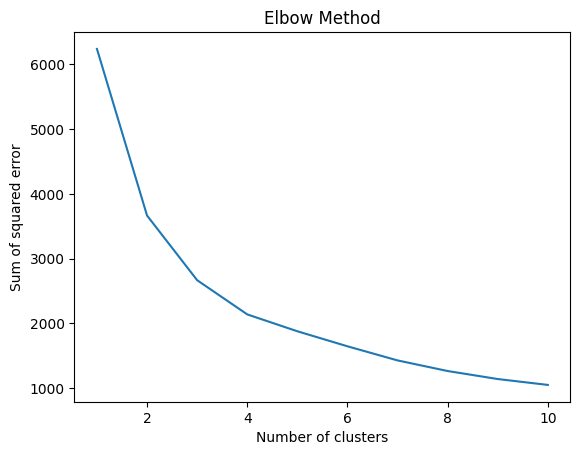

In [11]:
# find the optimal value of k, using the Elbow Technique
see = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++')
    kmeans.fit(extracted_data)
    see.append(kmeans.inertia_)
plt.plot(range(1, 11), see)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.show()
# plt.savefig('image/elbow.png')

In [5]:
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(extracted_data)
y_predicted

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, ..., 0, 1, 2], dtype=int32)

In [6]:
data['cluster'] = y_predicted
data.head()

id_student code_module code_presentation  attempted_weight  adjusted_mark   
0        6516         AAA             2014J             100.0      48.055203  \
3       11391         AAA             2013J             100.0      64.006980   
4       23629         BBB             2013B              25.0      13.803681   
5       23698         CCC             2014J             150.0      73.300000   
6       23798         BBB             2013J             100.0      90.340760   

   mark gender               region imd_band  age_band  num_of_prev_attempts   
0  31.8      M             Scotland        8         3                     0  \
3  41.2      M  East Anglian Region        9         3                     0   
4   8.3      F  East Anglian Region        2         1                     2   
5  55.0      F  East Anglian Region        5         1                     0   
6  44.6      M                Wales        5         1                     0   

   studied_credits disability final_result  edu  cluster  
0               60          N         Pass    1        0  
3              240          N         Pass    1        0  
4               60          N         Fail    0        1  
5              120          N  Distinction    0        2  
6               60          N  Distinction    0        2

In [7]:
km.cluster_centers_

array([[51.97283225,  4.7588804 ,  1.32025629,  0.14478417],
       [17.68329649,  4.19488491,  1.26419437,  0.12276215],
       [79.37177206,  5.30459022,  1.35588181,  0.23174131]])

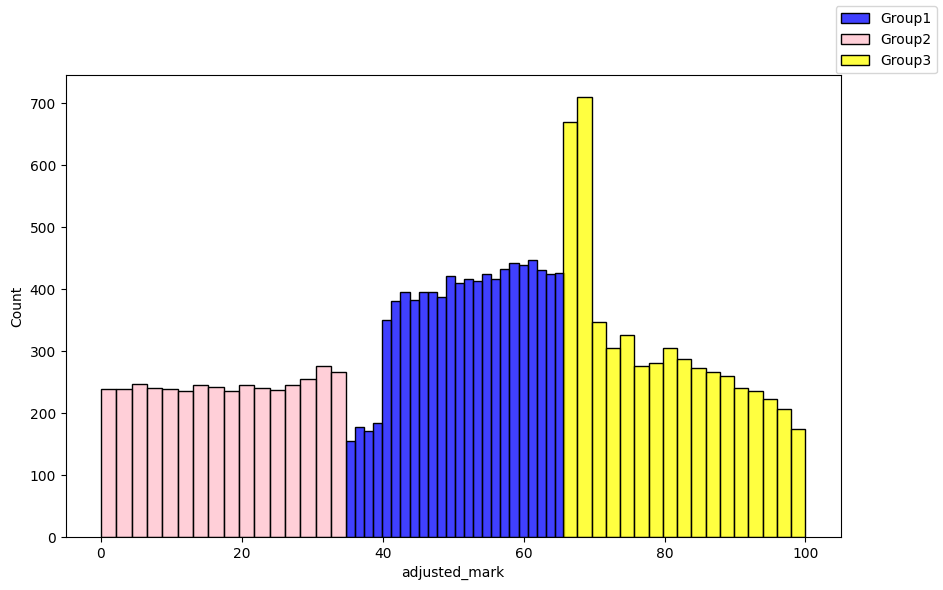

In [9]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
fig = plt.figure(figsize=(10,6))
sns.histplot(df1.adjusted_mark, color='blue')
sns.histplot(df2.adjusted_mark, color='pink')
sns.histplot(df3.adjusted_mark, color='yellow')

fig.legend(labels=['Group1','Group2','Group3'])
plt.show()
# plt.savefig('image/groupclustering.png')

In [10]:
#preprocessing train data for Apriori
# 'imd_band'>=0.5 is 1 otherwise 0, means IMD>=50% is 1, 'age_band'>=0.5 is 1 otherwise 0 means >=35 is 1, 
def encode_units(x):
    if x >=0.5:
        return 1
    else:
        return 0
# 'adjusted_mark'>=0.4 is 1 means pass, otherwise 0
def encode_units_2(x):
    if x >=40:
        return 1
    else:
        return 0

data['imd_band'] = data['imd_band'].map(encode_units)
data['age_band'] = data['age_band'].map(encode_units)
data['adjusted_mark'] = data['adjusted_mark'].map(encode_units_2)
data['edu'] = data['edu'].map(encode_units)

data[['imd_band', 'age_band', 'edu','adjusted_mark']]

imd_band  age_band  edu  adjusted_mark
0             1         1    1              1
3             1         1    1              1
4             1         1    0              0
5             1         1    0              1
6             1         1    0              1
...         ...       ...  ...            ...
25837         1         1    0              1
25838         1         1    0              1
25840         1         1    0              1
25841         1         1    0              0
25842         1         1    1              1

[18187 rows x 4 columns]

In [11]:
# dividing data to train and test
train_data, test_data = np.split(data.sample(frac=1, random_state=1729), [int(0.8 * len(data))])
print(train_data.shape, test_data.shape)

(14549, 16) (3638, 16)


In [12]:
# dividing train_data to 3 groups, using Apriori to find frequent itemsetss
# Apriori: if A happen, the chance of result B happen
# Apply Apriori on each cluster separately
train_df1 = train_data[train_data.cluster==0]
train_df2 = train_data[train_data.cluster==1]
train_df3 = train_data[train_data.cluster==2]

print(train_df1.shape,train_df2.shape,train_df3.shape)

(7139, 16) (3103, 16) (4307, 16)


In [13]:
# Define Apriori parameters
min_support = 0.3

# Run Apriori on the first cluster
freq_items1 = apriori(train_df1[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 1 is: ")
freq_items1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                             itemsets  length
0  0.892982                           (imd_band)       1
1  1.000000                           (age_band)       1
2  0.923799                      (adjusted_mark)       1
3  0.892982                 (imd_band, age_band)       2
4  0.825886            (imd_band, adjusted_mark)       2
5  0.923799            (adjusted_mark, age_band)       2
6  0.825886  (imd_band, adjusted_mark, age_band)       3

In [14]:
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1

antecedents                consequents  antecedent support   
0                  (imd_band)                 (age_band)            0.892982  \
1                  (age_band)                 (imd_band)            1.000000   
2                  (imd_band)            (adjusted_mark)            0.892982   
3             (adjusted_mark)                 (imd_band)            0.923799   
4             (adjusted_mark)                 (age_band)            0.923799   
5                  (age_band)            (adjusted_mark)            1.000000   
6   (imd_band, adjusted_mark)                 (age_band)            0.825886   
7        (imd_band, age_band)            (adjusted_mark)            0.892982   
8   (adjusted_mark, age_band)                 (imd_band)            0.923799   
9                  (imd_band)  (adjusted_mark, age_band)            0.892982   
10            (adjusted_mark)       (imd_band, age_band)            0.923799   
11                 (age_band)  (imd_band, adjusted_mark)            1.000000   

    consequent support   support  confidence      lift  leverage  conviction   
0             1.000000  0.892982    1.000000  1.000000   0.00000         inf  \
1             0.892982  0.892982    0.892982  1.000000   0.00000    1.000000   
2             0.923799  0.825886    0.924863  1.001152   0.00095    1.014159   
3             0.892982  0.825886    0.894011  1.001152   0.00095    1.009703   
4             1.000000  0.923799    1.000000  1.000000   0.00000         inf   
5             0.923799  0.923799    0.923799  1.000000   0.00000    1.000000   
6             1.000000  0.825886    1.000000  1.000000   0.00000         inf   
7             0.923799  0.825886    0.924863  1.001152   0.00095    1.014159   
8             0.892982  0.825886    0.894011  1.001152   0.00095    1.009703   
9             0.923799  0.825886    0.924863  1.001152   0.00095    1.014159   
10            0.892982  0.825886    0.894011  1.001152   0.00095    1.009703   
11            0.825886  0.825886    0.825886  1.000000   0.00000    1.000000   

    zhangs_metric  
0        0.000000  
1        0.000000  
2        0.010749  
3        0.015096  
4        0.000000  
5        0.000000  
6        0.000000  
7        0.010749  
8        0.015096  
9        0.010749  
10       0.015096  
11       0.000000

In [15]:
# Run Apriori on the second cluster
freq_items2 = apriori(train_df2[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items2['length'] = freq_items2['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 2 is: ")
freq_items2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support              itemsets  length
0  0.843377            (imd_band)       1
1  1.000000            (age_band)       1
2  0.843377  (imd_band, age_band)       2

In [16]:
rules2 = association_rules(freq_items2, metric="lift", min_threshold=1)
print("rule 2 is :")
rules2

rule 2 is :


antecedents consequents  antecedent support  consequent support   support   
0  (imd_band)  (age_band)            0.843377            1.000000  0.843377  \
1  (age_band)  (imd_band)            1.000000            0.843377  0.843377   

   confidence  lift  leverage  conviction  zhangs_metric  
0    1.000000   1.0       0.0         inf            0.0  
1    0.843377   1.0       0.0         1.0            0.0

In [17]:
freq_items3 = apriori(train_df3[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items3['length'] = freq_items3['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 3 is: ")
freq_items3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                             itemsets  length
0  0.933829                           (imd_band)       1
1  1.000000                           (age_band)       1
2  1.000000                      (adjusted_mark)       1
3  0.933829                 (imd_band, age_band)       2
4  0.933829            (imd_band, adjusted_mark)       2
5  1.000000            (adjusted_mark, age_band)       2
6  0.933829  (imd_band, adjusted_mark, age_band)       3

In [18]:
rules3 = association_rules(freq_items3, metric="lift", min_threshold=1)
rules3

antecedents                consequents  antecedent support   
0                  (imd_band)                 (age_band)            0.933829  \
1                  (age_band)                 (imd_band)            1.000000   
2                  (imd_band)            (adjusted_mark)            0.933829   
3             (adjusted_mark)                 (imd_band)            1.000000   
4             (adjusted_mark)                 (age_band)            1.000000   
5                  (age_band)            (adjusted_mark)            1.000000   
6   (imd_band, adjusted_mark)                 (age_band)            0.933829   
7        (imd_band, age_band)            (adjusted_mark)            0.933829   
8   (adjusted_mark, age_band)                 (imd_band)            1.000000   
9                  (imd_band)  (adjusted_mark, age_band)            0.933829   
10            (adjusted_mark)       (imd_band, age_band)            1.000000   
11                 (age_band)  (imd_band, adjusted_mark)            1.000000   

    consequent support   support  confidence  lift  leverage  conviction   
0             1.000000  0.933829    1.000000   1.0       0.0         inf  \
1             0.933829  0.933829    0.933829   1.0       0.0         1.0   
2             1.000000  0.933829    1.000000   1.0       0.0         inf   
3             0.933829  0.933829    0.933829   1.0       0.0         1.0   
4             1.000000  1.000000    1.000000   1.0       0.0         inf   
5             1.000000  1.000000    1.000000   1.0       0.0         inf   
6             1.000000  0.933829    1.000000   1.0       0.0         inf   
7             1.000000  0.933829    1.000000   1.0       0.0         inf   
8             0.933829  0.933829    0.933829   1.0       0.0         1.0   
9             1.000000  0.933829    1.000000   1.0       0.0         inf   
10            0.933829  0.933829    0.933829   1.0       0.0         1.0   
11            0.933829  0.933829    0.933829   1.0       0.0         1.0   

    zhangs_metric  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
5             0.0  
6             0.0  
7             0.0  
8             0.0  
9             0.0  
10            0.0  
11            0.0

In [19]:
def get_itemset(onerowdata):
    itemset=set()
    if onerowdata['imd_band'] == 1:
        itemset.add('imd_band')
    if onerowdata['age_band'] == 1:
        itemset.add('age_band')
    if onerowdata['edu'] == 1:
        itemset.add('edu')
    return itemset
rulesLst=[rules1,rules2,rules3]
def get_result(itemset):
    new_data=itemset
    # Apply the association rules to the new data
    for rules in rulesLst:
        for _, rule in rules.iterrows():
            antecedent = set(rule['antecedents'])
            consequent = set(rule['consequents'])
            confidence = rule['confidence']
            support=rule['support']
        
            if len(antecedent) == len(new_data):
                if (support>=0.5) and (antecedent==new_data) and ('adjusted_mark' in consequent) and (confidence>=0.5):
                    print(f"Instance {new_data} predicts {consequent} confidence is {confidence}")
                    return 1
    return 0

In [26]:
# train data
train_group3=train_data[train_data.cluster==2]
train_group3

id_student code_module code_presentation  attempted_weight   
16201      614117         BBB             2014B             100.0  \
25395     2599784         BBB             2014J             100.0   
24841     2451523         CCC             2014J              84.0   
1130       164935         DDD             2013J             200.0   
1108       160945         GGG             2014B             100.0   
...           ...         ...               ...               ...   
520         98313         BBB             2013B             100.0   
20551      654539         CCC             2014J             150.0   
1418       197595         BBB             2013B             100.0   
24535     2341830         DDD             2014J             200.0   
11548      576791         FFF             2013J             100.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
16201              1  30.5      F   East Anglian Region         0         0  \
25395              1  21.5      F     South West Region         0         0   
24841              1  38.8      F     South East Region         0         1   
1130               1  74.8      M  North Western Region         1         0   
1108               1  42.3      F   East Anglian Region         0         0   
...              ...   ...    ...                   ...       ...       ...   
520                1  39.4      F              Scotland         0         1   
20551              1  66.7      F              Scotland         1         0   
1418               1  37.6      F         London Region         0         1   
24535              1  67.3      F              Scotland         0         0   
11548              1  45.8      M          North Region         0         0   

       num_of_prev_attempts  studied_credits disability final_result  edu   
16201                     0               60          N         Pass    1  \
25395                     0               60          N         Pass    1   
24841                     0               60          N  Distinction    1   
1130                      0               60          N  Distinction    1   
1108                      0               30          N         Pass    1   
...                     ...              ...        ...          ...  ...   
520                       0               60          N         Pass    1   
20551                     0               90          N  Distinction    1   
1418                      0               60          N         Pass    1   
24535                     1               90          N  Distinction    1   
11548                     0              120          N  Distinction    1   

       cluster  
16201        2  
25395        2  
24841        2  
1130         2  
1108         2  
...        ...  
520          2  
20551        2  
1418         2  
24535        2  
11548        2  

[2402 rows x 16 columns]

In [20]:
# applying rules3 to trained data group 3, cluster=2
#  applying associated rules to test_data group3, cluster=2
for index, row in train_data.iterrows():
    # print(index,row)
    itemset=get_itemset(row)
    result = get_result(itemset)
    train_data.loc[index,"apriori"]=result
    
train_data

Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'}

id_student code_module code_presentation  attempted_weight   
614        109772         GGG             2014B             100.0  \
781        128889         BBB             2013J             100.0   
16201      614117         BBB             2014B             100.0   
23012      943374         CCC             2014J             150.0   
7392       527306         DDD             2013B             197.0   
...           ...         ...               ...               ...   
19769      647395         BBB             2014J             100.0   
24535     2341830         DDD             2014J             200.0   
25539     2632491         DDD             2013B              25.5   
11548      576791         FFF             2013J             100.0   
16434      617331         CCC             2014B               2.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
614                1  37.5      F          South Region         1         1  \
781                1  42.0      F          South Region         1         1   
16201              1  30.5      F   East Anglian Region         1         1   
23012              0  35.7      M              Scotland         1         1   
7392               1  53.8      F  North Western Region         1         1   
...              ...   ...    ...                   ...       ...       ...   
19769              1  43.0      F  East Midlands Region         1         1   
24535              1  67.3      F              Scotland         1         1   
25539              0   6.9      M                 Wales         1         1   
11548              1  45.8      M          North Region         1         1   
16434              0   0.6      M          South Region         0         1   

       num_of_prev_attempts  studied_credits disability final_result  edu   
614                       0               30          N         Pass    0  \
781                       1              120          N         Pass    0   
16201                     0               60          N         Pass    1   
23012                     0               30          N         Pass    0   
7392                      0               60          N         Pass    0   
...                     ...              ...        ...          ...  ...   
19769                     0               60          N  Distinction    0   
24535                     1               90          N  Distinction    1   
25539                     0               60          N         Fail    0   
11548                     0              120          N  Distinction    1   
16434                     0               60          N         Fail    0   

       cluster  apriori  
614          0      1.0  
781          0      1.0  
16201        0      0.0  
23012        0      1.0  
7392         0      1.0  
...        ...      ...  
19769        2      1.0  
24535        2      0.0  
25539        1      1.0  
11548        2      0.0  
16434        1      1.0  

[14549 rows x 17 columns]

In [21]:
# train_joined=pd.merge(train_data,train_group3,on=['id_student','code_module','code_presentation'],how='left', suffixes=('', '_y'))
# train_joined.drop(train_joined.filter(regex='_y$').columns, axis=1, inplace=True)
# train_joined

# Test, applying associated rules

In [22]:
# test data
# test_group3=test_data[test_data.cluster==2]
# test_group3

In [23]:
#  applying associated rules to test_data group3, cluster=2
for index, row in test_data.iterrows():
    # print(index,row)
    itemset=get_itemset(row)
    result = get_result(itemset)
    test_data.loc[index,'apriori']=result
    
test_data

Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'} confidence is 0.9248627450980392
Instance {'imd_band', 'age_band'} predicts {'adjusted_mark'}

id_student code_module code_presentation  attempted_weight   
10130      560643         GGG             2014J              33.3  \
1752       245217         CCC             2014J             120.0   
2856       336213         DDD             2014J             200.0   
11323      574819         DDD             2013J             200.0   
21485      681746         DDD             2014J             200.0   
...           ...         ...               ...               ...   
19025      635124         FFF             2014B              25.0   
16538      618338         GGG             2014B             100.0   
1794       248994         DDD             2013B             200.0   
4496       425332         FFF             2014B              25.0   
2380       298476         BBB             2013B             100.0   

       adjusted_mark  mark gender                region  imd_band  age_band   
10130              0   8.3      F   East Anglian Region         1         1  \
1752               0  30.1      M  East Midlands Region         1         1   
2856               1  65.0      M                 Wales         1         1   
11323              1  52.6      F     South West Region         1         1   
21485              1  74.0      F     South East Region         1         1   
...              ...   ...    ...                   ...       ...       ...   
19025              0   8.1      M     South East Region         1         1   
16538              1  35.8      M         London Region         1         1   
1794               1  83.9      F                 Wales         0         1   
4496               0  11.5      M     South East Region         1         1   
2380               1  35.3      F          North Region         1         1   

       num_of_prev_attempts  studied_credits disability final_result  edu   
10130                     0               30          Y         Fail    0  \
1752                      1              250          N         Fail    0   
2856                      0               60          N  Distinction    0   
11323                     0              120          N  Distinction    0   
21485                     0               60          N  Distinction    0   
...                     ...              ...        ...          ...  ...   
19025                     0               60          N         Fail    0   
16538                     0               30          N         Pass    0   
1794                      0               60          N  Distinction    0   
4496                      1               60          Y         Fail    0   
2380                      2              130          N         Pass    0   

       cluster  apriori  
10130        1      1.0  
1752         0      1.0  
2856         0      1.0  
11323        0      1.0  
21485        2      1.0  
...        ...      ...  
19025        1      1.0  
16538        0      1.0  
1794         2      1.0  
4496         1      1.0  
2380         0      1.0  

[3638 rows x 17 columns]

In [24]:
# test_joined=pd.merge(test_data,test_group3,on=['id_student','code_module','code_presentation'],how='left', suffixes=('', '_y'))
# test_joined.drop(test_joined.filter(regex='_y$').columns, axis=1, inplace=True)
# test_joined

In [25]:
# test_joined[test_joined['apriori']==1]

In [26]:
# combine test and train dataframes
final_data=pd.concat([train_data,test_data])
final_data.shape

(18187, 17)

In [27]:
pd.DataFrame(final_data).to_csv('final_data.csv')

In [28]:
# cluster==0 depends on apriori
final_data['predict'] = final_data['apriori']
#cluster==2 more likely to success, predict=1
final_data.loc[final_data.cluster==0,'predict']=1
#cluster==1 more likely to fail, predict=0
final_data.loc[final_data.cluster==1,'predict']=0

In [29]:
pd.DataFrame(final_data).to_csv('final_result.csv')

# Testing report

In [30]:
y_test=final_data['adjusted_mark']
y_pred_test=final_data['predict']
X_test=final_data
test_acc = accuracy_score(y_test,y_pred_test)
test_rep = classification_report(y_test,y_pred_test)

print()
print("---- METRICS RESULTS FOR TESTING DATA ----")
print()
print("Total Rows are: ", X_test.shape[0])
print('[TESTING] Model Accuracy is: ', test_acc)
print('[TESTING] Testing Report: ')
print(test_rep)


---- METRICS RESULTS FOR TESTING DATA ----

Total Rows are:  18187
[TESTING] Model Accuracy is:  0.8935503381536262
[TESTING] Testing Report: 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      4606
           1       0.95      0.91      0.93     13581

    accuracy                           0.89     18187
   macro avg       0.85      0.88      0.86     18187
weighted avg       0.90      0.89      0.90     18187



# Random forecast


In [50]:
df = pd.read_csv('data/combined-data.csv')

In [ ]:
# preprocess "edu" column
df["edu"] = df["edu"] .map({"Level or lower":0, "HE or higher":1})

# change code_module 
df["code_module"] = df["code_module"].map({"AAA":1, "BBB":2, "CCC":3, "DDD":4, "EEE":5, "FFF":6, "GGG":7})

# change code_presentation
df["code_presentation"] = df["code_presentation"].map({"2013B":1, "2013J":2, "2014B":3, "2014J":4})

# change gender
df["gender"] = df["gender"].map({"M":1, "F":0})

# change age_band
df["age_band"] = df["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

#change disability
df["disability"] = df["disability"].map({"N":0, "Y":1})

# change imd_band 
df["imd_band"] = df["imd_band"].map({"01/10/2020":'', "0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

# change final_result
df["final_result"] = df["final_result"].map({"Withdrawn":0,  "Fail":1,  "Pass":2, "Distinction":3})


In [55]:

df.drop(columns="region", axis=1, inplace=True)

# delete adjusted_mark and mark
df = df.drop(columns=["adjusted_mark","mark"])

df.head()

id_student  code_module  code_presentation  attempted_weight  gender   
0        6516            1                  4             100.0       1  \
1        8462            4                  2              40.0       1   
2        8462            4                  4              50.0       1   
3       11391            1                  2             100.0       1   
4       23629            2                  1              25.0       0   

  imd_band  age_band  num_of_prev_attempts  studied_credits  disability   
0        8         3                     0               60           0  \
1        3         3                     0               90           0   
2        3         3                     1               60           0   
3        9         3                     0              240           0   
4        2         1                     2               60           0   

   final_result  edu  
0             2    1  
1             0    1  
2             0    1  
3             2    1  
4             1    0

In [60]:
df.isnull().values.any()

False

In [59]:
df.dropna(inplace=True)

In [61]:
# dividing data to train data and test data
train_df, test_df = np.split(df.sample(frac=1, random_state=1729), [int(0.8 * len(df))])
print(train_df.shape, test_df.shape)

(17788, 12) (4448, 12)


In [62]:
from sklearn.ensemble import RandomForestClassifier

# random forecast
features = list(train_df.columns)
label = "final_result"
    
print("Building training and testing datasets")
print()
    
X_train = train_df.drop(label, axis=1)
y_train = train_df[label]
X_test = test_df.drop(label, axis=1)
y_test = test_df[label]

print('Column order: ')
print(features)
print()
    
print("Label column is: ",label)
print()
    
print("Data Shape: ")
print()
print("---- SHAPE OF TRAINING DATA (80%) ----")
print(X_train.shape)
print(y_train.shape)
print()
print("---- SHAPE OF TESTING DATA (20%) ----")
print(X_test.shape)
print(y_test.shape)
print()
    
  
print("Training RandomForest Model.....")
print()
n_estimators=100
# max_features=5
model =  RandomForestClassifier(n_estimators=n_estimators, verbose = 3,n_jobs=-1)
model.fit(X_train, y_train)
print()
    
y_pred_test = model.predict(X_test)
X_test['predict'] = y_pred_test
test_acc = accuracy_score(y_test,y_pred_test)
test_rep = classification_report(y_test,y_pred_test)

print()
print("---- METRICS RESULTS FOR TESTING DATA ----")
print()
print("Total Rows are: ", X_test.shape[0])
print('[TESTING] Model Accuracy is: ', test_acc)
print('[TESTING] Testing Report: ')
print(test_rep)

Building training and testing datasets

Column order: 
['id_student', 'code_module', 'code_presentation', 'attempted_weight', 'gender', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'edu']

Label column is:  final_result

Data Shape: 

---- SHAPE OF TRAINING DATA (80%) ----
(17788, 11)
(17788,)

---- SHAPE OF TESTING DATA (20%) ----
(4448, 11)
(4448,)

Training RandomForest Model.....

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [63]:
X_test.head()

id_student  code_module  code_presentation  attempted_weight  gender   
13877      596496            2                  4               0.0       0  \
10536      566694            3                  4               2.0       0   
13241      591785            2                  2              24.0       1   
6555       507523            3                  3             150.0       1   
517         98094            1                  2             100.0       1   

      imd_band  age_band  num_of_prev_attempts  studied_credits  disability   
13877        7         1                     0              180           0  \
10536        2         1                     0               90           0   
13241        2         1                     0              120           0   
6555         8         1                     0               60           0   
517          7         2                     0               60           0   

       edu  predict  
13877    1        0  
10536    0        0  
13241    0        1  
6555     1        3  
517      0        2

In [65]:
pd.DataFrame(X_test).to_csv('data/randomforecast_pre.csv')

In [66]:
# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz
# from sklearn import tree
# import matplotlib.pyplot as plt

# Export the first three decision trees from the forest
rf = model
cn=['Withdrawn', 'Fail', 'Pass', 'Distinction']
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               class_names=cn,
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    print("******graph******")
    print(graph)

******graph******
digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="code_presentation <= 3.5\nsamples = 100.0%\nvalue = [0.179, 0.199, 0.379, 0.243]\nclass = Pass", fillcolor="#dbedfa"] ;
1 [label="code_module <= 4.5\nsamples = 65.4%\nvalue = [0.171, 0.222, 0.382, 0.225]\nclass = Pass", fillcolor="#d7ebfa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="edu <= 0.5\nsamples = 37.2%\nvalue = [0.195, 0.211, 0.293, 0.302]\nclass = Distinction", fillcolor="#fefcff"] ;
1 -> 2 ;
3 [label="(...)", fillcolor="#C0C0C0"] ;
2 -> 3 ;
3036 [label="(...)", fillcolor="#C0C0C0"] ;
2 -> 3036 ;
3615 [label="studied_credits <= 52.5\nsamples = 28.2%\nvalue = [0.14, 0.236, 0.501, 0.124]\nclass = Pass", fillcolor="#baddf6"] ;
1 -> 3615 ;
3616 [label="(...)", fillcolor="#C0C0C0"] ;
3615 -> 3616 ;
4571 [label="(...)", fillcolor="#C0C0C0"] ;
3615 -> 4571 ;
7160 [label="gender <= 0.5\nsamples = 34.6%\nvalue = 

# Students interaction with the specific VLE

In [31]:
inter_df=pd.read_csv('data/interactive-data.csv')
inter_df.head()

Unnamed: 0 code_module code_presentation  id_student  total_clicks   
0           0         AAA             2013J       11391           935  \
1           1         AAA             2013J       58873          1733   
2           2         AAA             2013J       77367           681   
3           3         AAA             2013J      100893           745   
4           4         AAA             2013J      102806          1945   

   dataplus  dualpane  externalquiz  folder  forumng  ...  gender   
0         0         0             0       0      194  ...       M  \
1         9         0             0       0      229  ...       F   
2         0         0             0       0       78  ...       M   
3         5         0             0       0      255  ...       M   
4         4         0             0       0      414  ...       M   

                 region  imd_band  age_band  num_of_prev_attempts   
0   East Anglian Region   90-100%      55<=                     0  \
1   East Anglian Region    20-30%      0-35                     0   
2  East Midlands Region    30-40%      0-35                     0   
3      Yorkshire Region    20-30%      0-35                     0   
4  North Western Region    30-40%      0-35                     0   

   studied_credits  disability  final_result             edu  Group  
0              240           N          Pass    HE or higher      1  
1               60           N          Pass  Level or lower      2  
2               60           N          Pass  Level or lower      2  
3               60           N          Pass  Level or lower      2  
4               60           N          Pass  Level or lower      2  

[5 rows x 38 columns]

In [32]:
# pre-processing the columns
# change age_band
inter_df["age_band"] = inter_df["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
inter_df["edu"] = inter_df["edu"] .map({"Level or lower":0, "HE or higher":1})

# change imd_band 
inter_df["imd_band"] = inter_df["imd_band"].map({"01/10/2020":'', "0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

inter_df.dropna(inplace=True)
inter_df.shape

(6189, 38)

In [33]:
# extract the four features, 'imd_band', 'age_band', 'edu','adjusted_mark'
predict_data = inter_df[['imd_band', 'age_band', 'edu','adjusted_mark']]
# predict_data = data[['imd_band']]
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(predict_data)
y_predicted

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [34]:
inter_df['cluster'] = y_predicted
inter_df.head()

Unnamed: 0 code_module code_presentation  id_student  total_clicks   
0           0         AAA             2013J       11391           935  \
1           1         AAA             2013J       58873          1733   
2           2         AAA             2013J       77367           681   
3           3         AAA             2013J      100893           745   
4           4         AAA             2013J      102806          1945   

   dataplus  dualpane  externalquiz  folder  forumng  ...   
0         0         0             0       0      194  ...  \
1         9         0             0       0      229  ...   
2         0         0             0       0       78  ...   
3         5         0             0       0      255  ...   
4         4         0             0       0      414  ...   

                 region  imd_band  age_band  num_of_prev_attempts   
0   East Anglian Region         9         3                     0  \
1   East Anglian Region         2         1                     0   
2  East Midlands Region         3         1                     0   
3      Yorkshire Region         2         1                     0   
4  North Western Region         3         1                     0   

   studied_credits  disability  final_result  edu  Group  cluster  
0              240           N          Pass    1      1        1  
1               60           N          Pass    0      2        1  
2               60           N          Pass    0      2        1  
3               60           N          Pass    0      2        1  
4               60           N          Pass    0      2        1  

[5 rows x 39 columns]

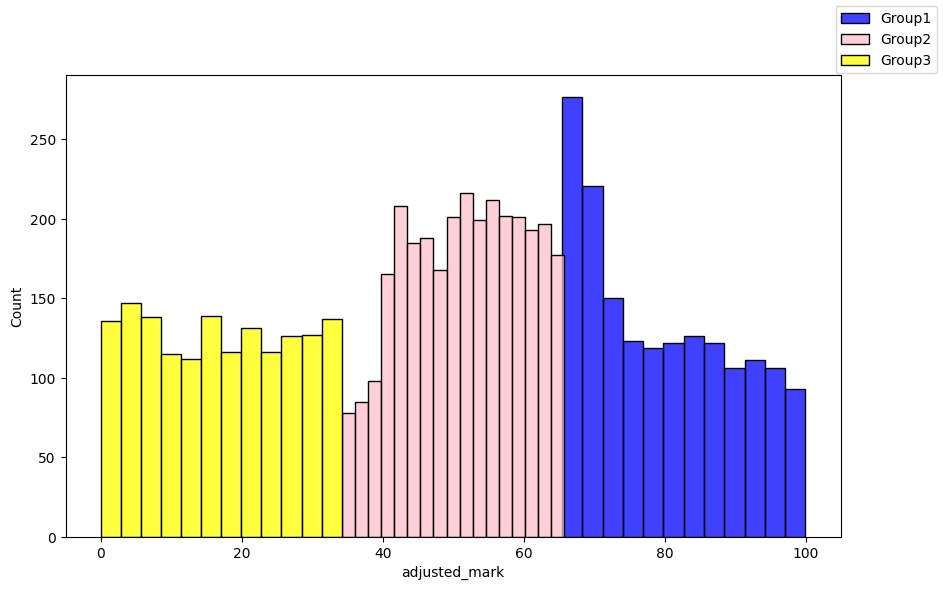

In [35]:
# Divide students into 3 groups
group1 = inter_df[inter_df.cluster==0]
group2 = inter_df[inter_df.cluster==1]
group3 = inter_df[inter_df.cluster==2]

# Draw distribution of adjusted_mark for both groups
fig = plt.figure(figsize=(10,6))
sns.histplot(group1.adjusted_mark, color='blue')
sns.histplot(group2.adjusted_mark, color='pink')
sns.histplot(group3.adjusted_mark, color='yellow')

fig.legend(labels=['Group1','Group2','Group3'])
plt.show()

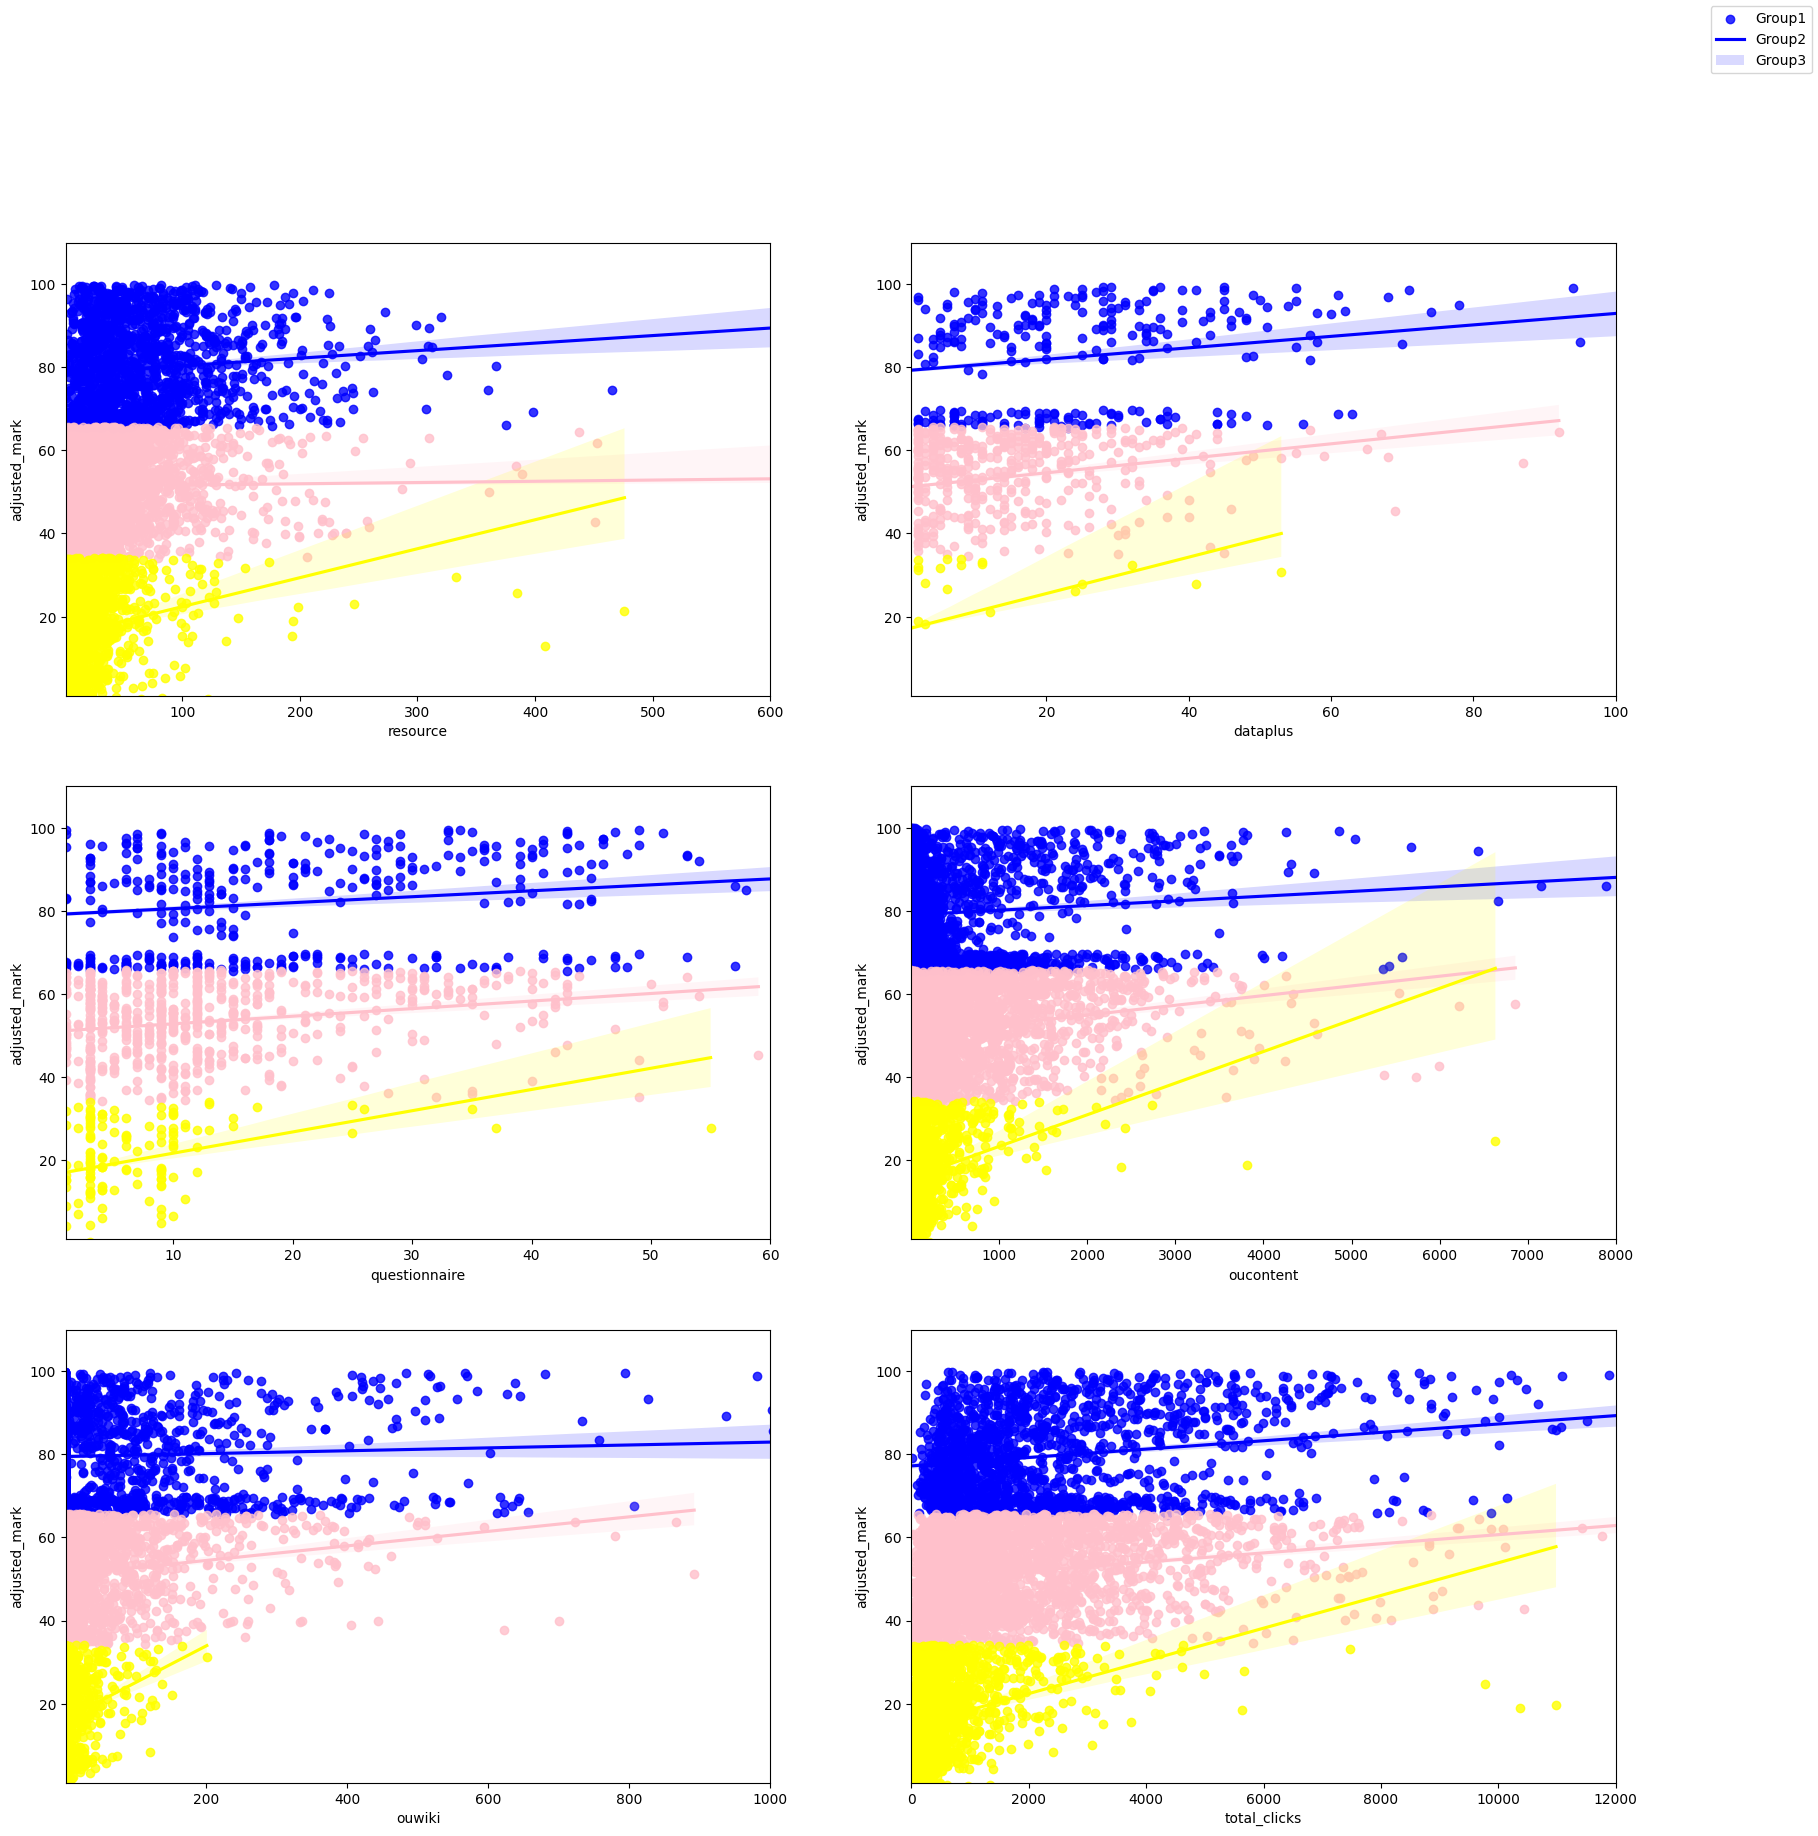

In [36]:
# Create a figure
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Add first subplot to figure
ax = fig.add_subplot(3, 2, 1)
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=group3, label= "GRoup 3",ci=95, ax=ax, color='yellow')
ax1.set_xlim(1,600)
ax1.set_ylim(1,110)

# Add second subplot to figure
ax = fig.add_subplot(3, 2, 2)
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=group2, label= "Group 2",ci=95, ax=ax, color='pink')
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=group3, label= "Group 3",ci=95, ax=ax, color='yellow')
ax2.set_xlim(1,100)
ax2.set_ylim(1,110)

# Add third subplot to figure
ax = fig.add_subplot(3, 2, 3)
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=group3, label= "GRoup 3",ci=95, ax=ax, color='yellow')
ax3.set_xlim(1,60)
ax3.set_ylim(1,110)


# Add fourth subplot to figure
ax = fig.add_subplot(3, 2, 4)
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=group3, label= "GRoup 3",ci=95, ax=ax, color='yellow')
ax4.set_xlim(1,8000)
ax4.set_ylim(1,110)

# Add fiveth subplot to figure
ax = fig.add_subplot(3, 2, 5)
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=group3, label= "GRoup 2",ci=95, ax=ax, color='yellow')
ax5.set_xlim(1,1000)
ax5.set_ylim(1,110)

# Add sixth subplot to figure
ax = fig.add_subplot(3, 2, 6)
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=group3, label= "GRoup 3",ci=95, ax=ax, color='yellow')
ax6.set_xlim(0,12000)
ax6.set_ylim(1,110)

fig.legend(labels=['Group1','Group2','Group3'])

plt.show()